### Segmentation des clients d'une enseigne

#### Contexte :
La segmentation consiste à découper l'ensemble des clients en sous ensembles homogènes appelés segments. Elle permet alors à l'entreprise de réaliser des actions marketing différenciées ou une offre produit spécifique à chaque segment.

Dans cette optique, la segmentation est également un enjeu pour les magasins, d'autant plus que ces derniers sont en mesure de collecter de précieuses informations via les cartes de fidélité des clients.

#### Objectifs principaux :
Réaliser un algorithme de clustering (apprentissage non supervisé) à partir des données des clients d'un magasin de la grande distribution.

Cela permettra à l'enseigne de :
- Affiner la connaissance de ses clients
- Etablir un plan marketing adapté par type de clients
- Optimiser l'allocation de ses ressources 

#### Le Dataset :
Le dataset utilisé comporte les données de 2 240 clients du magasin, probablement des informations issues des cartes de fidélité de l'enseigne.

###### Socio-démographiques (People) :

ID: ID du client \
Year_Birth: Date de naissance \
Education: Niveau d'éducation \
Marital_Status: Status marital \
Income: Salaire annuel \
Kidhome: Nombre d'enfants dans le foyer \
Teenhome: Nombre d'adolescents dans le foyer \
Dt_Customer: Date du premier achat dans le magasin \
Recency: Nombre de jours depuis le dernier achat \
Complain: 1 si le client s'est plaint au cours des 2 dernières années, 0 sinon 

###### Produits (Product) : 

MntWines: Montant dépensé en vin au cours des deux dernières années \
MntFruits: Montant dépensé en fruits au cours des deux dernières années \
MntMeatProducts: Montant dépensé en viande au cours des deux dernières années \
MntFishProducts: Montant dépensé en poisson au cours des deux dernières années \
MntSweetProducts: Montant dépensé en sucreries au cours des deux dernières années \
MntGoldProds: Montant dépensé en bijouterie au cours des deux dernières années 

###### Promotion (Promotion) : 

NumDealsPurchases: Nombre d'achats fait avec une réduction \
AcceptedCmp1: 1 si le client a accepté une offre lors de la campange n°1, 0 sinon \
AcceptedCmp2: 1 si le client a accepté une offre lors de la campange n°2, 0 sinon \
AcceptedCmp3: 1 si le client a accepté une offre lors de la campange n°3, 0 sinon \
AcceptedCmp4: 1 si le client a accepté une offre lors de la campange n°4, 0 sinon \
AcceptedCmp5: 1 si le client a accepté une offre lors de la campange n°5, 0 sinon \
Response: 1 si le client a accepté une offre lors de la dernière campagne, 0 sinon 

###### Canal (Place) : 

NumWebPurchases: Nombre d'achats via le site internet du magasin \
NumCatalogPurchases: Nombre d'achats via le catalogue du magasin \
NumStorePurchases: Nombre d'achats directement faits en magasin \
NumWebVisitsMonth: Nombre de visites effectués sur le site internet le mois dernier 

### Première exploration du dataset

In [1]:
#Import modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
#Lecture du fichier
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
#Recherche de données manquantes
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [4]:
#Recherche de doublons
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

- 24 données sur le revenu des clients sont manquantes, nous supprimons ces observations.
- Dt_Customer n'est pas au format date mais nous n'utiliserons pas cette variable pour la segmentation.

In [6]:
#Suppression des données manquantes
df = df.dropna()
print('Nouvelle taille du dataset :', len(df))

Nouvelle taille du dataset : 2216


In [7]:
#Suppression de la colonne Dt_Customer
df = df.drop('Dt_Customer', axis = 1)

In [8]:
df = df.copy()

In [9]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [10]:
#identifier variables catégorielles et numériques puis les stockées dans une liste
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype != 'object']

print(cat_col)
print(num_col)

['Education', 'Marital_Status']
['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


### Data cleaning 

#### Variables catégorielles

In [11]:
for col in df[cat_col] :
    display(df[col].value_counts())

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

- Pas d'incohérence sur le niveau d\'éducation mais beaucoup de catégories.
- Beaucoup de statuts maritaux et quelques refus de réponse.

Simplification puis correction par le mode des quelques refus de réponses.

In [12]:
#Simplification du status marital
df['Marital_Status'] = df['Marital_Status'].replace({'Married' : 'Together', 
                                                     'Alone' : 'Single', 
                                                     'Divorced': 'Single', 
                                                     'Widow' :'Single' })

df['Marital_Status'] = df['Marital_Status'].replace({'Absurd' : df['Marital_Status'].mode()[0],'YOLO' : df['Marital_Status'].mode()[0]})


In [13]:
#Simplification du niveau d'éducation
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [14]:
#Nouvelles catégories simplifiées
for col in df[cat_col] :
    display(col, df[col].value_counts())

'Education'

Graduate         1116
Postgraduate      846
Undergraduate     254
Name: Education, dtype: int64

'Marital_Status'

Together    1434
Single       782
Name: Marital_Status, dtype: int64

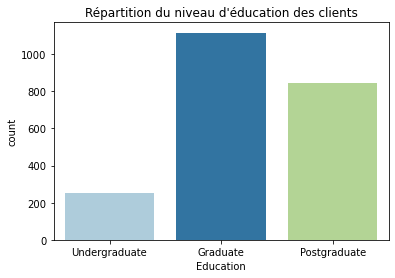

In [15]:
#Représentation de la répartition du niveau d'éducation
order_education = ['Undergraduate', 'Graduate', 'Postgraduate']
sns.set_palette('Paired')
sns.countplot(x='Education', order =order_education, data = df,)
plt.title('Répartition du niveau d\'éducation des clients');

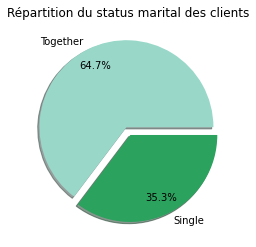

In [16]:
plt.title('Répartition du status marital des clients')
plt.pie (x = df['Marital_Status'].value_counts(),
        labels = ['Together', 'Single'],
         explode = [0.05,0.05],
         colors = ['#99d8c9','#2ca25f'],
         labeldistance = 1.1,
         autopct = lambda x: str(np.round(x, 1)) + '%',
         pctdistance =0.8,
         shadow = True);

#### Variables numériques

In [17]:
#Changement des noms des noms des montants par produits
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [18]:
#identifier variables catégorielles et numériques puis les stockées dans une liste
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype != 'object']

print(cat_col)
print(num_col)

['Education', 'Marital_Status']
['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


In [19]:
#Création d'une colonne montant total qui somme les dépenses totales des clients
df['MntTT'] = df['Wines'] + df['Fruits'] + df['Meat'] + df['Fish'] + df['Sweets'] + df['Gold']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,MntTT
0,5524,1957,Graduate,Single,58138.0,0,0,58,635,88,...,0,0,0,0,0,0,3,11,1,1617
1,2174,1954,Graduate,Single,46344.0,1,1,38,11,1,...,0,0,0,0,0,0,3,11,0,27
2,4141,1965,Graduate,Together,71613.0,0,0,26,426,49,...,0,0,0,0,0,0,3,11,0,776
3,6182,1984,Graduate,Together,26646.0,1,0,26,11,4,...,0,0,0,0,0,0,3,11,0,53
4,5324,1981,Postgraduate,Together,58293.0,1,0,94,173,43,...,0,0,0,0,0,0,3,11,0,422


In [20]:
#Calcul de l'âge des clients
df['age'] = 2015 - df['Year_Birth']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,MntTT,age
0,5524,1957,Graduate,Single,58138.0,0,0,58,635,88,...,0,0,0,0,0,3,11,1,1617,58
1,2174,1954,Graduate,Single,46344.0,1,1,38,11,1,...,0,0,0,0,0,3,11,0,27,61
2,4141,1965,Graduate,Together,71613.0,0,0,26,426,49,...,0,0,0,0,0,3,11,0,776,50
3,6182,1984,Graduate,Together,26646.0,1,0,26,11,4,...,0,0,0,0,0,3,11,0,53,31
4,5324,1981,Postgraduate,Together,58293.0,1,0,94,173,43,...,0,0,0,0,0,3,11,0,422,34


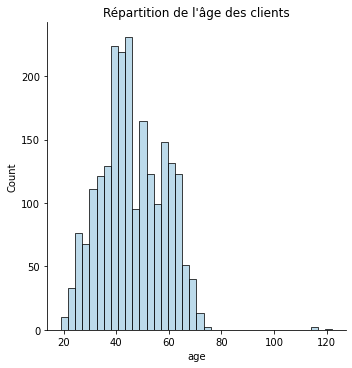

In [21]:
# Répartion âge des clients
sns.displot(x='age', data = df)
plt.title('Répartition de l\'âge des clients');

Certains clients sont très agés, on considère qu'il s'agit de valeurs abérrantes

In [22]:
#Recherche des clients qui ont un âge supérieur à 100
df.loc[df['age'] > 100]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,MntTT,age
192,7829,1900,Undergraduate,Single,36640.0,1,0,99,15,6,...,0,0,0,0,1,3,11,0,65,115
239,11004,1893,Undergraduate,Single,60182.0,0,1,23,8,0,...,0,0,0,0,0,3,11,0,22,122
339,1150,1899,Postgraduate,Together,83532.0,0,0,36,755,144,...,0,1,0,0,0,3,11,0,1853,116


In [23]:
#Suppression du dataset des clients âgés de plus de 100 ans 
df = df.loc[df['age'] < 100]
print('Nouvelle taille du dataset :', len(df))

Nouvelle taille du dataset : 2213


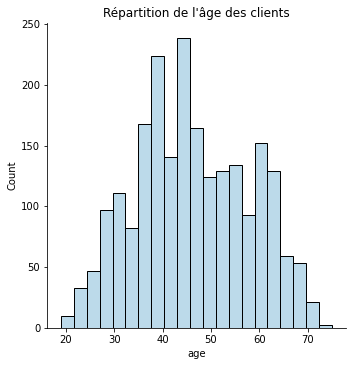

In [24]:
# Répartion âge des clients après modifications
sns.displot(x='age', data = df)
plt.title('Répartition de l\'âge des clients');

In [25]:
#Suppresion de la colonne Year_Birth à présent inutile
df = df.drop('Year_Birth', axis = 1)

In [26]:
#Z_CostContact et Z_Revenue sont constants pour tous les clients, on supprime les colonnes
df = df.drop(['Z_CostContact', 'Z_Revenue'], axis = 1)

In [27]:
# MAJ variables stockées dans une liste
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype != 'object']

print(cat_col)
print(num_col)

['Education', 'Marital_Status']
['ID', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'MntTT', 'age']


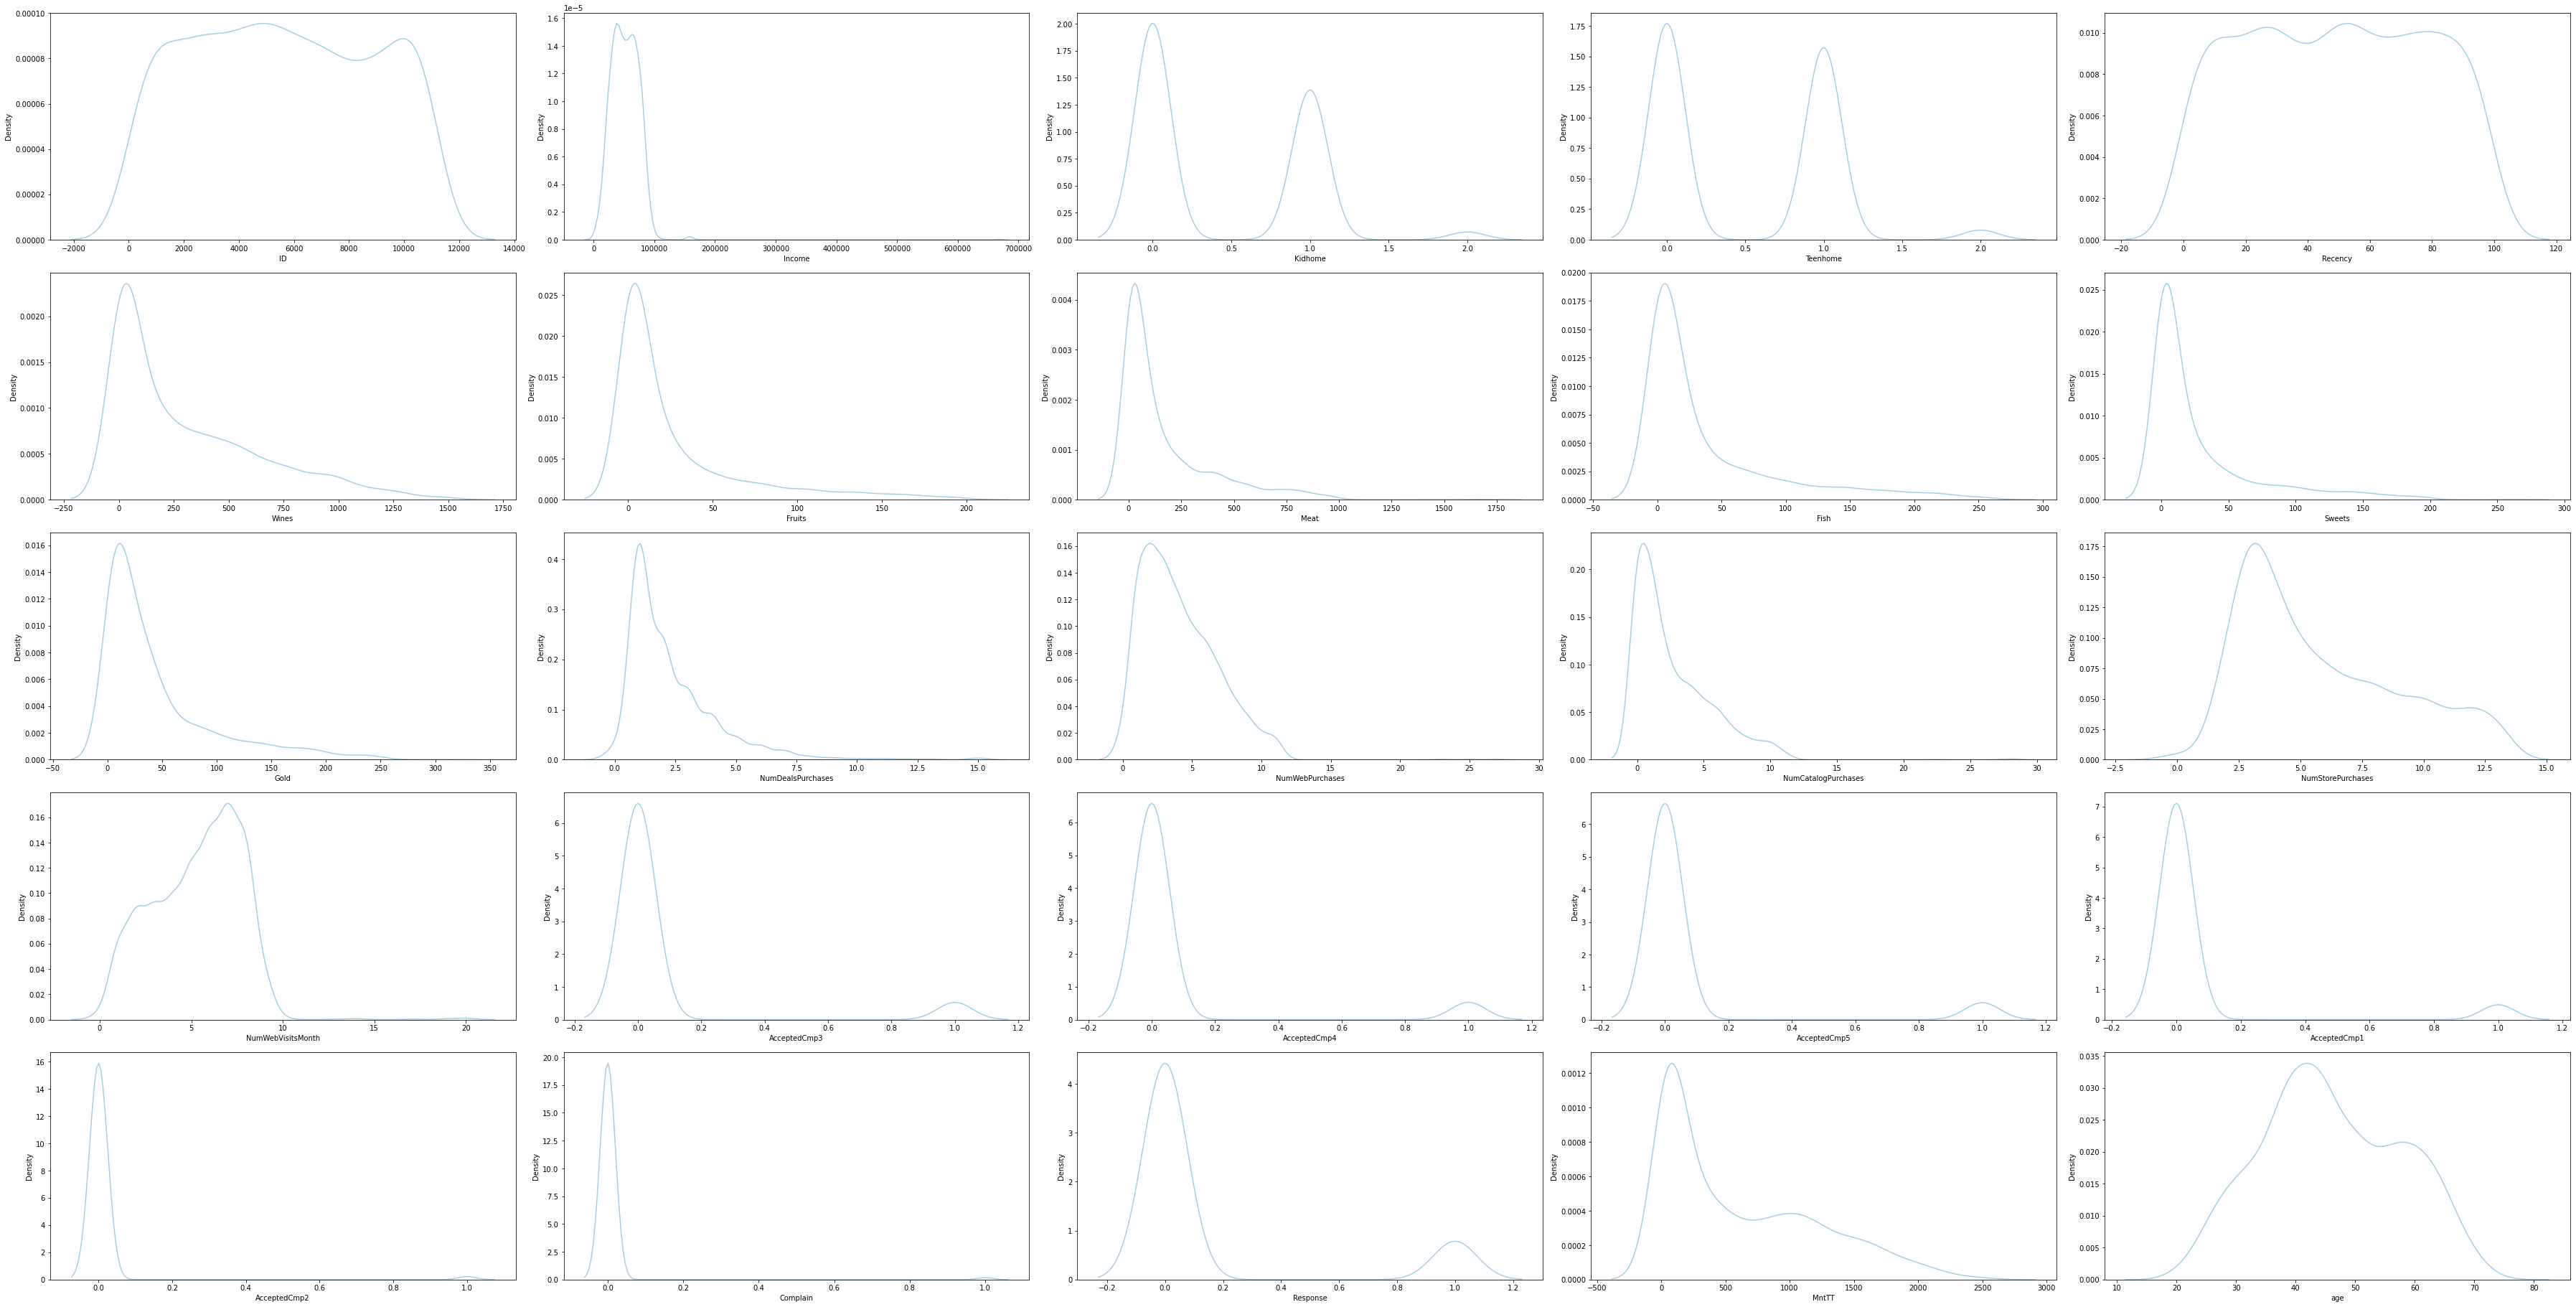

In [28]:
#Représentation des variables numériques
plt.figure(figsize = (50,30))
plot_number = 1

for column in num_col :
    ax = plt.subplot(6, 5, plot_number)
    sns.kdeplot(x=column, data = df)
    plt.xlabel(column)
        
    plot_number += 1

plt.tight_layout()
plt.show()

### Datavisualisation et Statistiques

#### Axe socio-démographique

In [29]:
#Création d'une colonne is_parent = au moins un enfant au sein du foyer
df['is_parent'] = np.where((df['Kidhome'] > 0) | (df['Teenhome'] > 0), 1, 0)
df.head() 

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,MntTT,age,is_parent
0,5524,Graduate,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,0,1,1617,58,0
1,2174,Graduate,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,0,0,27,61,1
2,4141,Graduate,Together,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,0,0,776,50,0
3,6182,Graduate,Together,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,0,0,53,31,1
4,5324,Postgraduate,Together,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,0,0,422,34,1


In [30]:
#Création d'une nouvelle colonne qui comptabilise le nombre total d'enfants par famille
df['child'] = df['Kidhome'] + df['Teenhome'] 

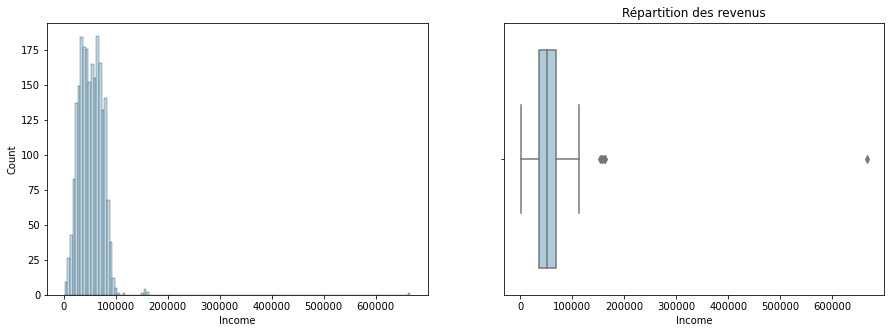

In [31]:
#Répartition des revenus
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(x='Income', data = df)

plt.subplot(1,2,2)
sns.boxplot(x='Income', data= df)
plt.title('Répartition des revenus');

In [32]:
#Recherche des clients qui ont un revenu supérieur à 150000
df.loc[df['Income'] > 150000]

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,MntTT,age,is_parent,child
164,8475,Postgraduate,Together,157243.0,0,1,98,20,2,1582,...,0,0,0,0,0,0,1608,42,1,1
617,1503,Postgraduate,Together,162397.0,1,1,31,85,1,16,...,0,0,0,0,0,0,107,39,1,2
655,5555,Graduate,Single,153924.0,0,0,81,1,1,1,...,0,0,0,0,0,0,6,40,0,0
687,1501,Postgraduate,Together,160803.0,0,0,21,55,16,1622,...,0,0,0,0,0,0,1717,33,0,0
1300,5336,Postgraduate,Together,157733.0,1,0,37,39,1,9,...,0,0,0,0,0,0,59,44,1,1
1653,4931,Graduate,Together,157146.0,0,0,13,1,0,1725,...,0,0,0,0,0,0,1730,38,0,0
2132,11181,Postgraduate,Together,156924.0,0,0,85,2,1,2,...,0,0,0,0,0,0,8,66,0,0
2233,9432,Graduate,Together,666666.0,1,0,23,9,14,18,...,0,0,0,0,0,0,62,38,1,1


In [33]:
#Suppresion de l'observation la plus éloignée
df = df.loc[df['Income'] < 600000]
print('Nouvelle taille du dataset :', len(df))

Nouvelle taille du dataset : 2212


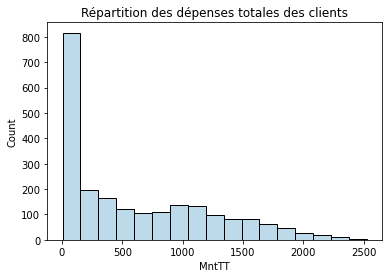

In [34]:
# Analyse du montant des dépenses totales
plt.title('Répartition des dépenses totales des clients')
sns.histplot(x='MntTT', data = df);

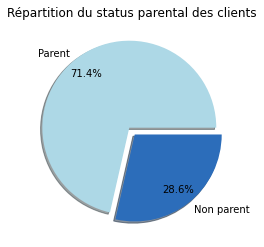

In [35]:
plt.title('Répartition du status parental des clients')
plt.pie (x = df['is_parent'].value_counts(),
        labels = ['Parent', 'Non parent'],
         explode = [0.05,0.05],
         colors = ['#add8e6','#2c6dba'],
         labeldistance = 1.1,
         autopct = lambda x: str(np.round(x, 1)) + '%',
         pctdistance =0.8,
         shadow = True);

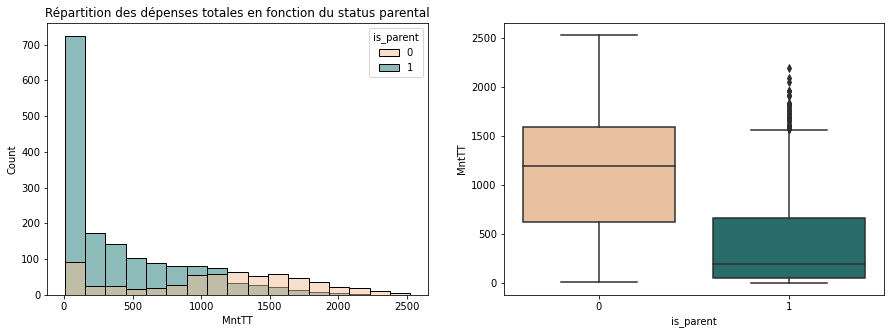

In [36]:
# Analyse du montant des dépenses totales en fonction du status parental

plt.figure(figsize=(15,5))


plt.subplot(1,2,1)
color_is_parent = {0: '#f4c095', 1 :'#1d7874'}
plt.title('Répartition des dépenses totales en fonction du status parental')
sns.histplot(x='MntTT', hue = 'is_parent', palette = color_is_parent, data = df);

plt.subplot(1,2,2)
sns.boxplot(y='MntTT', x = 'is_parent', palette = color_is_parent, data = df);

In [37]:
import statsmodels.api

result = statsmodels.formula.api.ols('MntTT ~ is_parent', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)

,df,sum_sq,mean_sq,F,PR(>F)
is_parent,1.0,2.183749e+08,2.183749e+08,826.005972,1.320981e-154
Residual,2210.0,5.842675e+08,2.643745e+05,NaN,NaN


 Les parents vont avoir tendance à moins dépenser dans ce magasin que les non parents.

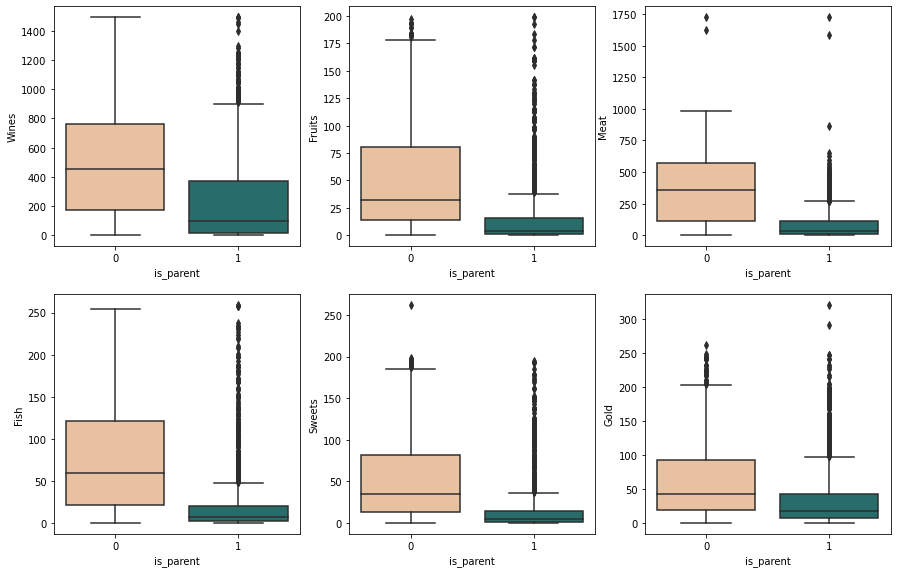

In [38]:
# Analyse du montant des dépenses par catégorie de produits en fonction du status parental
plt.figure(figsize=(15,15))

plt.subplot(3,3,1)
sns.boxplot(y='Wines', x = 'is_parent',  palette = color_is_parent, data = df)

plt.subplot(3,3,2)
sns.boxplot(y='Fruits', x = 'is_parent', palette = color_is_parent, data = df)

plt.subplot(3,3,3)
sns.boxplot(y='Meat', x = 'is_parent', palette = color_is_parent, data = df)

plt.subplot(3,3,4)
sns.boxplot(y='Fish', x = 'is_parent', palette = color_is_parent, data = df)

plt.subplot(3,3,5)
sns.boxplot(y='Sweets', x = 'is_parent',  palette = color_is_parent, data = df)

plt.subplot(3,3,6)
sns.boxplot(y='Gold', x = 'is_parent', palette = color_is_parent, data = df);

Cette propension à moins dépenser des parents se retrouve dans toutes les catégories de produits.
Cependant, de nombreuses valeurs extrêmes se retrouvent dans les dépenses des parents, la parentalité n'est pas le seul critère qui explique les différences de comportement d'achat des clients.

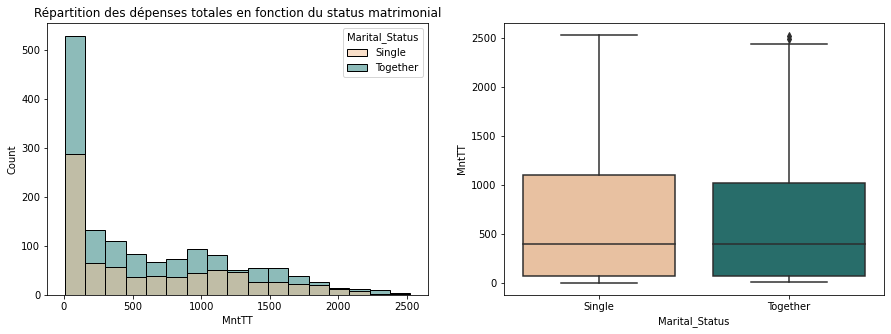

In [39]:
# Analyse du montant des dépenses totales en fonction du status matrimonial
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Répartition des dépenses totales en fonction du status matrimonial')
color = {'Single': '#f4c095', 'Together' : '#1d7874'}
sns.histplot(x='MntTT', hue = 'Marital_Status', palette= color, data = df)

plt.subplot(1,2,2)
sns.boxplot(y='MntTT', x = 'Marital_Status', palette = color, data = df);

In [40]:
import statsmodels.api

result = statsmodels.formula.api.ols('MntTT ~ Marital_Status', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)

,df,sum_sq,mean_sq,F,PR(>F)
Marital_Status,1.0,3.112133e+05,311213.338054,0.857229,0.354616
Residual,2210.0,8.023312e+08,363045.796692,NaN,NaN


Le status matrimonial ne semble pas avoir d'impact significatif sur les dépenses totales.

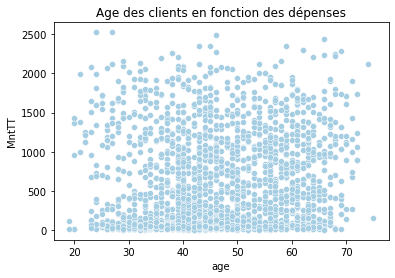

In [41]:
plt.title('Age des clients en fonction des dépenses')
sns.scatterplot(x= 'age', y='MntTT', data = df);

Il ne semble pas y avoir de relation linéaire entre l'âge et le montant dépensé dans le magasin.

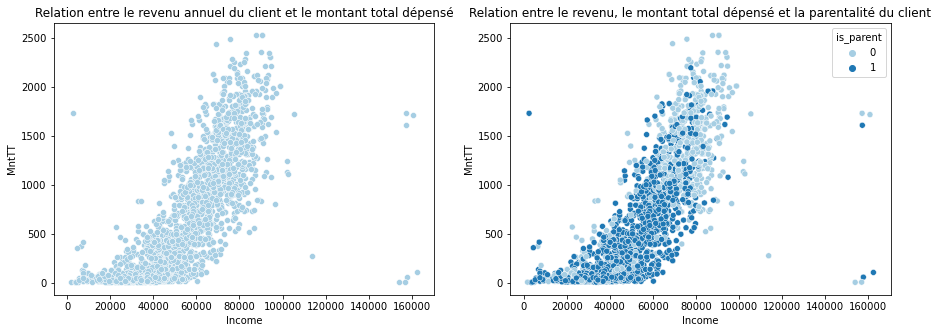

In [42]:
#Analyse de la relation entre le revenue et montant global dépensé
plt.figure(figsize=(15,5))


plt.subplot(1,2,1)
plt.title('Relation entre le revenu annuel du client et le montant total dépensé')
sns.scatterplot(x='Income', y='MntTT', data = df)

plt.subplot(1,2,2)
plt.title('Relation entre le revenu, le montant total dépensé et la parentalité du client')
sns.scatterplot(x='Income', y='MntTT', hue='is_parent', data = df);

In [43]:
#Test de corrélation entre revenu et montant total dépensé
from scipy.stats import pearsonr
pd.DataFrame(pearsonr(df['Income'], df['MntTT']), index=['pearson_coeff','p-value'], columns=['resultat_test'])


,resultat_test
pearson_coeff,0.79274
p-value,0.00000


Le revenu influence significativement et positivement les montants totaux dépensés dans le magasin.

#### Axe lieu d'achat 

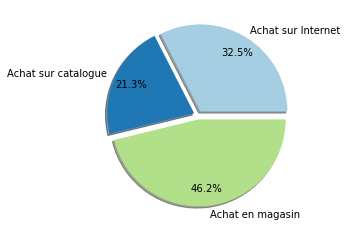

In [44]:
#Répartition des canaux d'achat utlisé par transaction
plt.pie(x= df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(),
        labels = ['Achat sur Internet', 'Achat sur catalogue', 'Achat en magasin'],
        explode = [0.05,0.05,0.05 ],
        labeldistance = 1.1,
        autopct = lambda x: str(np.round(x, 1)) + '%',
        pctdistance =0.8,
        shadow = True);

Les achats sur internet représentent un tiers du nombre de transactions.

In [45]:
df_parent_place = df.groupby('is_parent')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()
df_parent_place

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
is_parent,,,
0,2785,3013,4595
1,6258,2898,8249


Bien que le magasin physique reste le lieu d'achat privilégié par les parents et les non parents, les parents se distinguent par leurs achats proportionnellement plus imporants sur le site internet du magasin.

#### Axe promotion 

In [46]:
#Création variable nombre de campganes marketing acceptées
df['AcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

In [47]:
#Répartition du nombre de campganes marketing acceptées
df['AcceptedCmp'].value_counts()

0    1754
1     322
2      81
3      44
4      11
Name: AcceptedCmp, dtype: int64

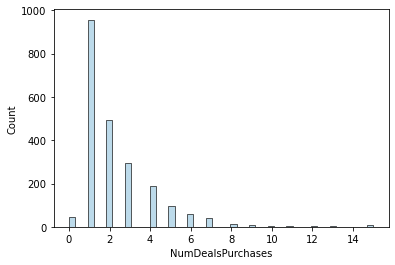

In [50]:
#Répartition du nombre d'achat avec une promo par client
sns.histplot(x='NumDealsPurchases', data = df);

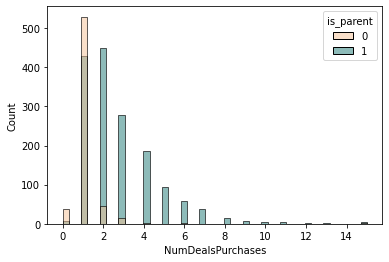

In [49]:
#Répartition du nombre d'achat avec une promo par client selon le status parental
sns.histplot(x='NumDealsPurchases', hue ='is_parent',palette = color_is_parent,data = df);

In [51]:
result = statsmodels.formula.api.ols('NumDealsPurchases ~ is_parent', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)

,df,sum_sq,mean_sq,F,PR(>F)
is_parent,1.0,1236.568716,1236.568716,393.076824,1.200732e-80
Residual,2210.0,6952.373418,3.145870,NaN,NaN


Les parents vont faire plus d'achat en promotion.

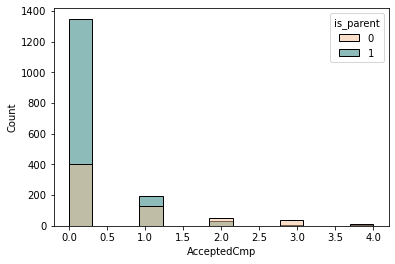

In [52]:
#Répartition du nombre d'achats répondants à une campagne marketing par client selon le status parental
sns.histplot(x='AcceptedCmp', hue ='is_parent', palette = color_is_parent,data = df);

In [56]:
result = statsmodels.formula.api.ols('AcceptedCmp ~ is_parent', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)

,df,sum_sq,mean_sq,F,PR(>F)
is_parent,1.0,79.488065,79.488065,186.566718,7.741332e-41
Residual,2210.0,941.586076,0.426057,NaN,NaN


A l'inverse, les parents ont moins tendance à répondre positivement aux campagnes marketing.

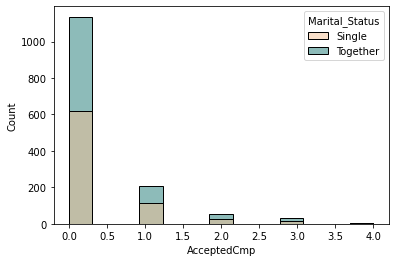

In [53]:
#Répartition du nombre d'achats répondants à une campagne marketing par client selon le status parental
sns.histplot(x='AcceptedCmp', hue ='Marital_Status',palette = color ,data = df);

In [54]:
result = statsmodels.formula.api.ols('AcceptedCmp ~ Marital_Status', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)

,df,sum_sq,mean_sq,F,PR(>F)
Marital_Status,1.0,0.001057,0.001057,0.002288,0.961856
Residual,2210.0,1021.073084,0.462024,NaN,NaN


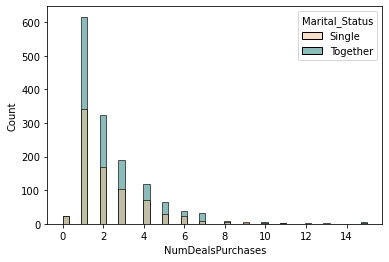

In [55]:
#Répartition du nombre d'achat avec une promo par client selon le status parental
sns.histplot(x='NumDealsPurchases', hue ='Marital_Status',palette = color,data = df);

In [60]:
result = statsmodels.formula.api.ols('NumDealsPurchases ~ Marital_Status', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)

,df,sum_sq,mean_sq,F,PR(>F)
Marital_Status,1.0,6.251033,6.251033,1.688293,0.193962
Residual,2210.0,8182.691101,3.702575,NaN,NaN


Le status marital n'influence pas non plus les achats sous promo ou avec coupon.

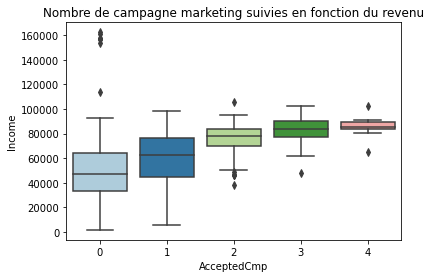

In [56]:
plt.title('Nombre de campagne marketing suivies en fonction du revenu')
sns.boxplot(x= 'AcceptedCmp', y='Income', data = df);

In [57]:
#Test de corrélation entre revenu et le nombre de coupons utilisés
from scipy.stats import pearsonr
pd.DataFrame(pearsonr(df['Income'], df['AcceptedCmp']), index=['pearson_coeff','p-value'], columns=['resultat_test'])


,resultat_test
pearson_coeff,3.659862e-01
p-value,4.489683e-71


Le revenu impacte positivement et significativement la propention à répondre positivement aux campagnes marketing de l'enseigne.

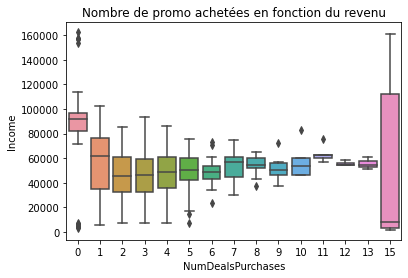

In [58]:
plt.title('Nombre de promo achetées en fonction du revenu')
sns.boxplot(x= 'NumDealsPurchases', y='Income', data = df);

In [59]:
#Test de corrélation entre revenu et le nombre promotions achetées
from scipy.stats import pearsonr
pd.DataFrame(pearsonr(df['Income'], df['NumDealsPurchases']), index=['pearson_coeff','p-value'], columns=['resultat_test'])


,resultat_test
pearson_coeff,-1.082069e-01
p-value,3.373568e-07


En revanche, les clients les plus aisés achètent moins en promotions.

### Data proccessing 

In [60]:
#Encodaage variable Education
df["Education"] = df["Education"].replace({'Undergraduate' : 0, 'Graduate': 1, 'Postgraduate': 2}) 

In [61]:
#Sélection des variables utliser pour le modèle
df = df[['Education', 'Marital_Status', 'Income', 'Recency', 'MntTT', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'age', 'child', 'AcceptedCmp']]

In [62]:
#identifier variables catégorielles stockées dans une liste
object_cols = ['Marital_Status']

In [63]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)

C:\Users\Lyly Angie\AppData\Local\Temp\ipykernel_20584\4204202020.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=df[[i]].apply(LE.fit_transform)


In [64]:
#Normalisation de data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
norm = sc.fit_transform(df)

norm

array([[-0.41167504, -1.35495293,  0.28710487, ...,  1.01835202,
        -1.26459792, -0.43915996],
       [-0.41167504, -1.35495293, -0.26088203, ...,  1.27478522,
         1.4045725 , -0.43915996],
       [-0.41167504,  0.73803302,  0.9131964 , ...,  0.33453017,
        -1.26459792, -0.43915996],
       ...,
       [-0.41167504, -1.35495293,  0.23334696, ..., -1.03311355,
        -1.26459792,  1.0326913 ],
       [ 1.12394923,  0.73803302,  0.80317156, ...,  1.10382975,
         0.06998729, -0.43915996],
       [ 1.12394923,  0.73803302,  0.04229031, ...,  1.27478522,
         1.4045725 , -0.43915996]])

In [65]:
from sklearn.decomposition import PCA
#Création d'une instance PCA
model = PCA()

#Stockage de la représentation de data obtenue par ACP 
coord_acp = model.fit_transform(norm)

Les valeurs propres sont : [4.30603539 1.6699011  1.15575721 1.0223243  1.00158566 0.99331066
 0.88939634 0.77841537 0.66950541 0.50080157 0.39965431 0.28716973
 0.20103218 0.13144275]


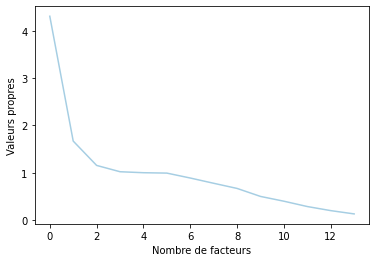

In [66]:
print('Les valeurs propres sont :', model.explained_variance_)

plt.plot(range(0,14), model.explained_variance_)
plt.xlabel('Nombre de facteurs')
plt.ylabel('Valeurs propres');

Les ratio sont : [0.30743491 0.11922473 0.08251677 0.07299015 0.07150949 0.07091869
 0.06349959 0.05557596 0.0478002  0.03575537 0.02853383 0.02050285
 0.01435295 0.00938452]


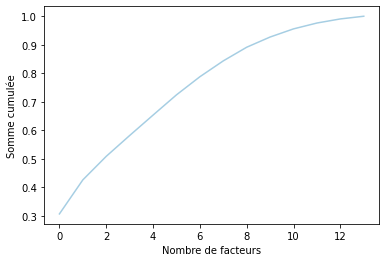

In [67]:
#Tracer le graphe de la somme cumulative représentant le ratio de la variance expliquée en fonction du nombre de composantes.
#Affichage du ratio de la variance expliquée pour chaque composante.
print('Les ratio sont :', model.explained_variance_ratio_)

plt.plot(np.arange(0,14), np.cumsum(model.explained_variance_ratio_))
plt.xlabel('Nombre de facteurs')
plt.ylabel('Somme cumulée');

5 composantes nous permet de retenir 75% de l'information.

In [68]:
#Intitialisation d'une PCA à 5 composantes 
pca = PCA(n_components=5)
pca.fit(df)
PCA_df = pd.DataFrame(pca.transform(df), columns=(["col1","col2", "col3", "col4", "col5"]))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-3.810770e-12,21532.578931,-50229.742670,-16730.878145,-590.359751,16540.954470,110399.896184
col2,2212.0,-8.215570e-14,367.183055,-2221.099642,-206.705468,37.017809,225.104223,2950.652913
col3,2212.0,-7.050820e-16,28.935143,-49.961909,-24.715067,0.614554,25.036996,50.784575
col4,2212.0,-1.260796e-15,11.440289,-27.626415,-8.876110,0.633477,8.119291,29.387644
col5,2212.0,5.602686e-16,2.815299,-11.509150,-1.869141,0.493387,1.987257,11.632485


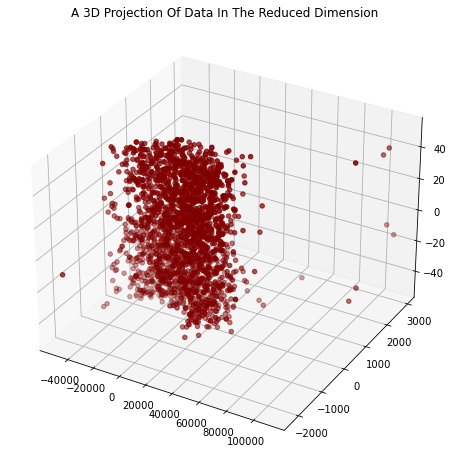

In [69]:
# Projection 3D des données normalisées 
x =PCA_df["col1"]
y =PCA_df["col2"]
z =PCA_df["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [ ]:
pip install yellowbrick

La méthode Elbow permet de determiner le nombre de clusters idéal à former :


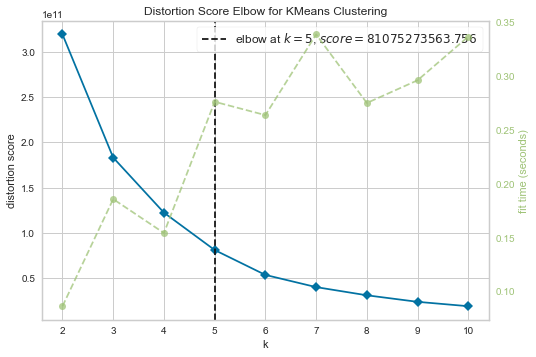

In [70]:
print('La méthode Elbow permet de determiner le nombre de clusters idéal à former :')
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df)
Elbow_M.show();

In [71]:
from sklearn.cluster import AgglomerativeClustering
#Instanciation du model 
AC = AgglomerativeClustering(n_clusters=5)
# Entrainement et prédictions de cluster
yhat_AC = AC.fit_predict(PCA_df)
PCA_df["Clusters"] = yhat_AC
#Ajout d'une colonne contenant les clusters prédits par le model au df 
df["Clusters"]= yhat_AC

C:\Users\Lyly Angie\AppData\Local\Temp\ipykernel_20584\197662460.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Clusters"]= yhat_AC


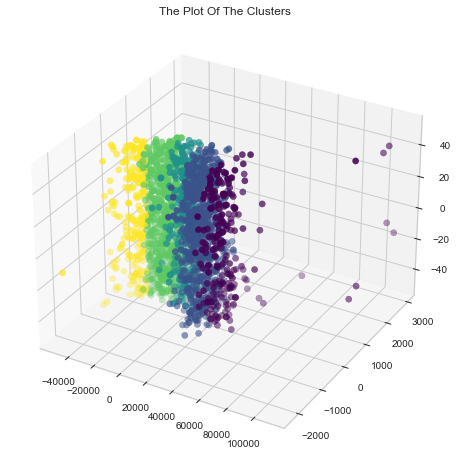

In [72]:
#Représentation 3D des clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o', cmap = 'viridis')
ax.set_title("The Plot Of The Clusters")
plt.show()

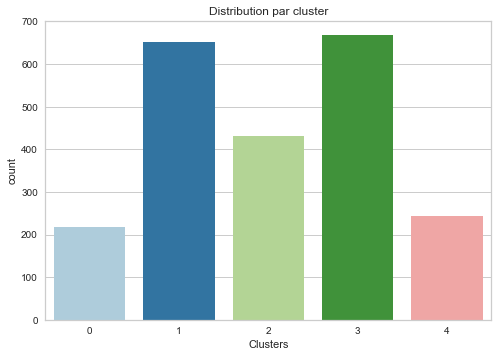

In [73]:
#Nombre d'individus par cluster
sns.set_palette('Paired')
sns.countplot(x=df["Clusters"])
plt.title("Distribution par cluster")
plt.show()

In [74]:
#Récupérer les prédictions des clusters
yhat_AC = AC.fit_predict(PCA_df)

In [75]:
# Ajouter les prédiction du K-Means à df  
df['cluster_result'] = yhat_AC
df['cluster_result'] = 'Cluster '+df['cluster_result'].astype(str)

# Calcul de la moyenne globale pour chaque variable 
df_profile_overall = pd.DataFrame()
df_profile_overall['Overall'] = df.describe().loc[['mean']].T

# Calcul de la moyenne de chaque cluster pour chaque variable 
df_cluster_summary = df.groupby('cluster_result').describe().T.reset_index().rename(columns={'level_0': 'Column Name', 'level_1': 'Metrics'})
df_cluster_summary = df_cluster_summary.loc[df_cluster_summary['Metrics'] == 'mean'].set_index('Column Name')
df_cluster_summary = df_cluster_summary.drop('Clusters', axis =0)


# Combiner les deux df 
print('Résumé par cluster :')
df_profile = df_cluster_summary.join(df_profile_overall).reset_index()
df_profile.style.background_gradient().hide(axis='index')

C:\Users\Lyly Angie\AppData\Local\Temp\ipykernel_20584\3596634473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_result'] = yhat_AC
C:\Users\Lyly Angie\AppData\Local\Temp\ipykernel_20584\3596634473.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_result'] = 'Cluster '+df['cluster_result'].astype(str)


Résumé par cluster :


Column Name,Metrics,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Overall
Education,mean,1.322581,1.320552,1.375000,1.284431,0.843621,1.268083
Marital_Status,mean,0.594470,0.662577,0.641204,0.651198,0.654321,0.647378
Income,mean,88123.539171,69013.799080,52144.986111,35672.181138,18343.345679,51958.810579
Recency,mean,49.940092,48.940184,49.358796,47.946108,50.757202,49.019439
MntTT,mean,1514.755760,1082.973926,462.000000,136.886228,71.818930,607.268083
NumDealsPurchases,mean,1.101382,2.176380,3.273148,2.293413,2.213992,2.324593
NumWebPurchases,mean,5.092166,5.651840,4.780093,2.535928,2.032922,4.088156
NumCatalogPurchases,mean,6.465438,4.539877,2.254630,0.669162,0.522634,2.672242
NumStorePurchases,mean,8.248848,8.357362,6.025463,3.498503,2.736626,5.806510
NumWebVisitsMonth,mean,2.345622,3.932515,5.789352,6.628743,7.279835,5.321429


#### A noter sur les segments identifiés : 

##### Cluster 0 : " Star" :  
* Des clients aux revenus supérieurs et ceux qui dépensent le plus dans l'enseigne
* Achètent sur tous les cannaux y compris le catalogue qu'ils privlégient au site internet contrairement aux autres clients
* Ceux sont les plus enclin à répondre positivement au campagnes marketing et ils achètent peu en promotion.
* Ils sont plutôt sans enfant

##### Cluster 1 : " Bon potentiel" :
* Clients aux revenus assez élevés et qui dépensent en proportion dans le magasin
* Ils répondent moins souvent positivement aux campagnes marketing que les clients stars mais sont aussi plus intéressés par les promotions que ces derniers.

##### Cluster 2 : " Chasseur de promo" :
* Des clients aux revenus inférieurs à ceux des clusters 0 et 1 
* Ces clients achètent plus souvent que les autres en promotion
* Ils visitent régulièrement le site internet
* Souvent des parents

##### Cluster 3 & 4 : " Les comparateurs" :
* Des clients plus jeunes aux revenus plus modestes que la moyenne qui dépensent également faiblement dans l'enseigne
* Ils n'achètent pas via le catalogue et se rendent moins en magasin que les autres.
* Ils consultent en revanche bien plus régulièrement le site internet
* On peut supposer qu'ils comparent les prix car malgré cette consultation plus fréquente, ils achètent pourtant moins que les autres sur le site internet.
* Ils ne recherchent pas particulièrement les promotions et ne répondent pas favorablement aux campagnes marketing.
* Les comportements d'achat se ressemblent, ce qui va différer entre ces clients (cluster 3 ou cluster 4) tient plus des caractéristiques socio-démographiques (niveau d'éducation, âge)

#### Ci-dessous, des représentations graphiques des différentes caractéristiques distinctivent des clusters résumées précédemment.

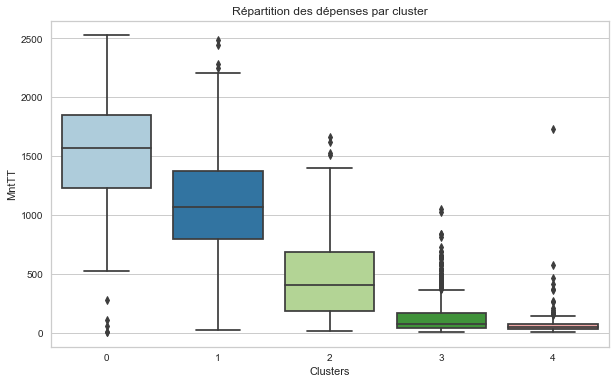

In [76]:
plt.figure(figsize=(10,6))
plt.title('Répartition des dépenses par cluster')
sns.boxplot(x=df["Clusters"], y=df["MntTT"]);

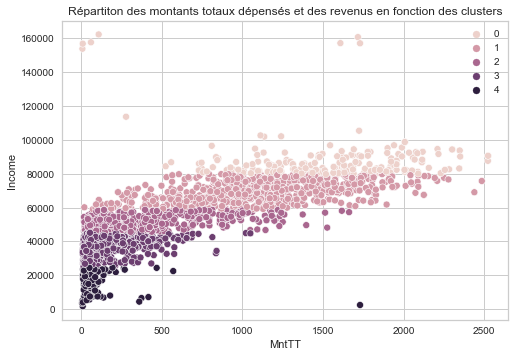

In [77]:
plt.title('Répartiton des montants totaux dépensés et des revenus en fonction des clusters')
sns.scatterplot(data = df,x=df["MntTT"], y=df["Income"],hue=df["Clusters"])
plt.legend()

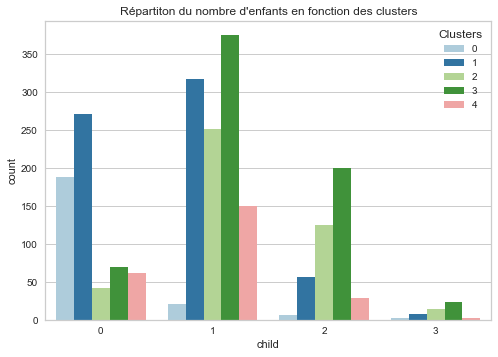

In [78]:
plt.title('Répartiton du nombre d\'enfants en fonction des clusters')
sns.countplot(x=df["child"],hue=df["Clusters"]);

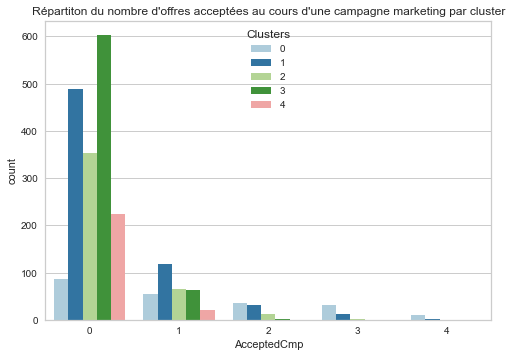

In [79]:
plt.title('Répartiton du nombre d\'offres acceptées au cours d\'une campagne marketing par cluster')
sns.countplot(x=df["AcceptedCmp"],hue=df["Clusters"]);

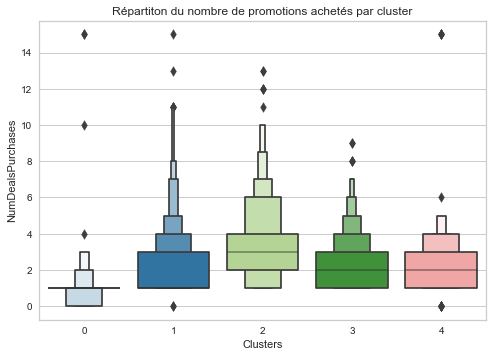

In [80]:
plt.title('Répartiton du nombre de promotions achetés par cluster')
sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters"]);

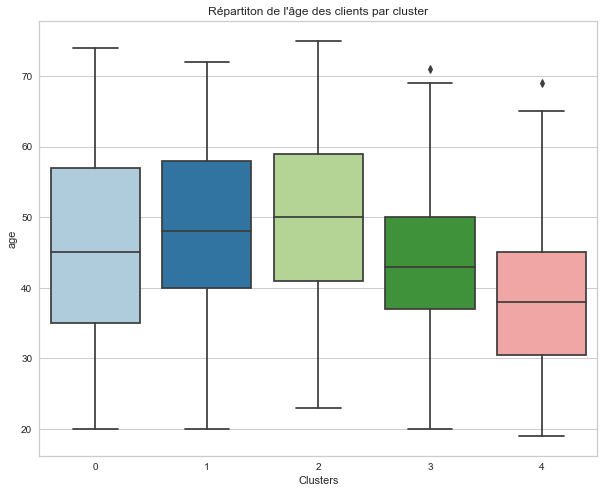

In [81]:
plt.figure(figsize=(10,8))
plt.title('Répartiton de l\'âge des clients par cluster')
sns.boxplot(x=df["Clusters"], y=df["age"]);

### Recommandations : 
* Clients "stars" ( ~ 10% des clients ) : clients fidèles qui sont très receptifs aux campagnes marketing. Cela en fait la cible à privilégier lors de celles-ci. 


* Clients "à potentiel" ( ~ 30% des clients ) : clients un peu moins réceptifs aux campagnes marketing que les clients "stars" et qui achètent cependant un peu plus en promotion. Identifier les promotions et campagnes qui fonctionnent le mieux sur ces clients (période, rayon concerné, type de canal) pour les fidéliser. 


* Clients "Chasseurs de promo " ( ~ 20% des clients ) : Ces clients recherchent les promotions plus que les autres. Identifier le type de promotion qui leur correspond. Ils consultent souvent le site internet, un bon moyen de communiquer sur celles-ci.


* Clients "comparateurs" ( ~ 40% des clients ): Peu fidèles au magasin et réceptifs aux campagnes de promotions. A moins cibler en cas de campagne. 